In [6]:
import tensorflow as tf
mnist= tf.keras.datasets.mnist # 28*28 image 
(x_train, y_train), (x_test, y_test) = mnist.load_data() #unpack data

#normalize the data. value will be between 0-1
x_train= tf.keras.utils.normalize(x_train,axis=1)
x_test= tf.keras.utils.normalize(x_test,axis=1)

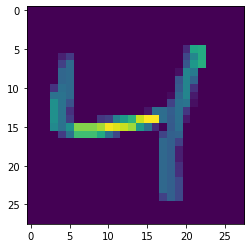

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
import matplotlib.pyplot as plt

plt.imshow(x_train[2])
plt.show()
print(x_train[0])

In [9]:
#build the model

model= tf.keras.models.Sequential()
#make flatten
model.add(tf.keras.layers.Flatten())
#hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #softmax use for probability distribution

In [10]:
# some parameter to train the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4639 - accuracy: 0.8699
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1124 - accuracy: 0.9657
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0738 - accuracy: 0.9770


In [11]:
#validation loss and accuracy calculation
val_loss, val_acc= model.evaluate(x_test,y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0905 - accuracy: 0.9714
0.09048493951559067 0.9714000225067139


In [12]:
#save a model
model.save('epic_num_reader.model')
#reload model
new_model= tf.keras.models.load_model('epic_num_reader.model')


INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [13]:
prediction= new_model.predict([x_test])
print(prediction)

[[6.3947333e-08 2.0333529e-07 2.0211342e-05 ... 9.9987459e-01
  6.9200283e-08 1.7676787e-06]
 [8.7818308e-10 7.9742531e-06 9.9999094e-01 ... 2.0538661e-10
  3.8416125e-08 1.8781440e-11]
 [7.7518214e-09 9.9993587e-01 8.6976770e-06 ... 2.0767766e-05
  1.5548569e-05 2.4108347e-06]
 ...
 [3.7609318e-10 7.6613514e-07 1.8677531e-07 ... 1.0818852e-05
  1.5138542e-07 3.4822850e-05]
 [1.3242534e-05 1.5304133e-06 1.8989198e-07 ... 9.7210872e-08
  3.6690817e-03 7.2350372e-07]
 [1.3719033e-07 2.6967362e-09 1.9242925e-08 ... 4.6839612e-11
  2.9605201e-09 4.4253281e-09]]


In [14]:
import numpy as np
print(np.argmax(prediction[0]))

7


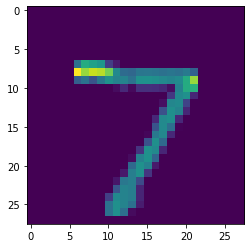

In [15]:
plt.imshow(x_test[0])
plt.show()